<a href="https://colab.research.google.com/github/majumderarnob/BRACU_CSE427-Machine_Learning/blob/main/Lab%202_Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv('/car_evaluation.csv')

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

feats = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
data.columns = col_names

data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [19]:
print(data.shape)

(1727, 7)


<Axes: >

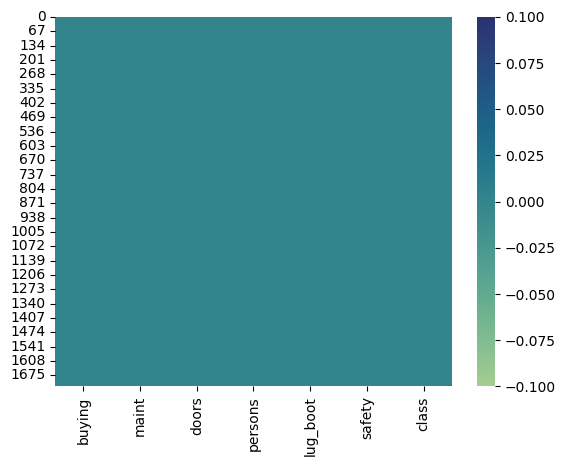

In [20]:
sbn.heatmap(data.isnull(), cmap = 'crest')

In [21]:
X = data.drop(['class'], axis=1)

y = data['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [22]:
pip install category_encoders

In [23]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
tencoder = ce.OrdinalEncoder(cols = ['class'])

X_train = encoder.fit_transform(X_train)
y_train = tencoder.fit_transform(y_train)
X_test = encoder.transform(X_test)
y_test = tencoder.transform(y_test)



In [31]:
X_train, y_test

(      buying  maint  doors  persons  lug_boot  safety
 83         1      1      1        1         1       1
 48         1      1      2        2         1       2
 468        2      1      2        3         2       2
 155        1      2      2        2         1       1
 1043       3      2      3        2         2       1
 ...      ...    ...    ...      ...       ...     ...
 1130       3      3      2        2         3       1
 1294       3      4      1        2         3       3
 860        2      4      1        2         3       1
 1459       4      2      3        1         2       3
 1126       3      3      2        2         2       3
 
 [1157 rows x 6 columns],
       class
 599       1
 932       1
 628       1
 1497      3
 1262      1
 ...     ...
 1601      1
 1033      1
 341       1
 147       1
 360       1
 
 [570 rows x 1 columns])

In [35]:
from numpy.ma import nonzero
from ast import Attribute
class DecisionTree():
  def __init__(self, _X, _y, _attributes, map):
    self.X = _X
    self.y = _y
    self.attributes = _attributes
    self.decision = None
    self.dictionary = {}
    self.attribute_name = ""
    self.feature_map = map

  def entropy(self, arr):
    entropy = 1
    _ , counts = np.unique(arr, return_counts=True)
    sum1 = sum(counts)
    for i in range(len(counts)):
      entropy -= (counts[i] / (sum1))**2

    return entropy

  def find_best_attribute(self):
    best_attribute = ""
    min_gini = 1
    for attribute in self.attributes :
      labels , counts = np.unique(self.X[attribute].to_numpy(), return_counts=True)
      gini = 0
      sum1 = sum(counts)
      for i in range(len(labels)):
        gini += (counts[i]/sum1) * self.entropy(self.y[self.X[attribute] == labels[i]])

      if gini <= min_gini:
        min_gini = gini
        best_attribute = attribute
    return best_attribute

  def build(self, feats=[]):
    u, c = np.unique(self.y.to_numpy(), return_counts = True)
    if len(u) == 0:
      return 0
    if len(self.attributes) == 0 or len(c) == 1:
      y = u[c == c.max()]
      self.decision = u[0]
      return self.decision

    else:
      attributes = self.attributes.copy()
      attribute = self.find_best_attribute()
      attributes.remove(attribute)
      u = np.unique(self.X[attribute].to_numpy())
      for label in u:
        X = self.X[self.X[attribute] == label].drop([attribute], axis=1)
        y = self.y[self.X[attribute] == label]
        self.dictionary.update({str(label) : DecisionTree(X, y, attributes, None)})
        self.dictionary[str(label)].build()
      self.dictionary.update({"ATTRIBUTE_NAME" : attribute})
      return self.dictionary

  def predict(self, x):
    tree = self
    try :
      while tree.decision == None:
        tree = tree.dictionary[str(x[tree.dictionary["ATTRIBUTE_NAME"]].to_numpy()[0])]
      return tree.decision
    except:
      return 0

  def print_the_tree(self, level = 0):
    if self.decision is not None:
      return " - -"*level + " pred "+ str(self.decision)
    else:
      str1 = " - -"*level + self.dictionary["ATTRIBUTE_NAME"] + "\n"
      for a in self.dictionary:
        if a != "ATTRIBUTE_NAME":
          str1 += "       " * level + a  +  self.dictionary[a].print_the_tree(level+1) + "\n"
      return str1

  def accuracy(self, X, y):
    right_count = 0
    for i in X.index:
      if self.predict(X.loc[[i]]) == int(y.loc[i]):
        right_count+=1

    return right_count/len(X)

In [36]:
from random import sample
from random import randint
class randomForest():

  def __init__(self,number_of_trees, number_of_features, number_of_instances, X_train, y_train, features):
    self.num_of_trees = number_of_trees
    self.num_of_features = number_of_features
    self.num_of_instances = number_of_instances
    self.X = X_train
    self.y = y_train
    self.features = features
    self.trees = []

  def train(self):
    feats = []
    for i in range(self.num_of_trees):
      num1 = randint(0, self.num_of_instances)
      feats = sample(self.features, self.num_of_features)
      x = self.X[feats].sample(n=self.num_of_instances, random_state=num1)
      y = self.y.sample(n=self.num_of_instances, random_state=num1)
      self.trees.append(DecisionTree(x , y , feats, None))
      self.trees[i].build()
    return

  def test(self,arr):
    preds = {}
    pred = ""
    for i in range(self.num_of_trees):
      pred = self.trees[i].predict(arr)
      if pred in preds:
        preds.update({pred : preds[pred] + 1})
      else:
        preds.update({pred : 1})

    ans1 = ""
    max1 = 0
    # print(preds)
    for a in preds:
      if preds[a] > max1:
        max1 = preds[a]
        ans1 = a
    return ans1

  def accuracy(self, X , y):
    right_count = 0
    for i in X.index:
      if self.test(X.loc[[i]]) == int(y.loc[i]):
        right_count+=1

    return right_count/len(X)

In [37]:
feats = feats = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
x = randomForest(100,5,200,X_train, y_train, feats)
x.train()

In [38]:
x.test(X_train.iloc[[5]])

2